In [164]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data= pd.merge(ride_data, city_data, how="left", on="city")

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

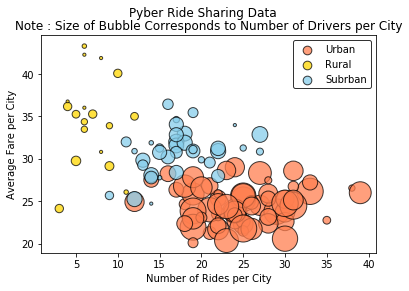

In [301]:
# Obtain the x and y coordinates for each of the three city types
urban_data= city_ride_data[city_ride_data["type"] == "Urban"]
rural_data= city_ride_data[city_ride_data["type"] == "Rural"]
suburban_data= city_ride_data[city_ride_data["type"] == "Suburban"]

urban_avg_fare=urban_data.groupby(["city"]).mean()["fare"]
urban_rides_count= urban_data.groupby(["city"]).count()["ride_id"]
urban_drivers_count= urban_data.groupby(["city"]).mean()["driver_count"]

suburban_avg_fare= suburban_data.groupby(["city"]).mean()["fare"]
suburban_rides_count= suburban_data.groupby(["city"]).count()["ride_id"]
suburban_drivers_count= suburban_data.groupby(["city"]).mean()["driver_count"]

rural_avg_fare= rural_data.groupby(["city"]).mean()["fare"]
rural_rides_count= rural_data.groupby(["city"]).count()["ride_id"]
rural_drivers_count= rural_data.groupby(["city"]).mean()["driver_count"]


# Build the scatter plots for each city types
plt.scatter(urban_rides_count, urban_avg_fare, s= 10*urban_drivers_count, c= "Coral", edgecolor= "black",
            linewidths= 1, marker="o", alpha= .75, label = "Urban")

plt.scatter(rural_rides_count, rural_avg_fare, s= 10*rural_drivers_count, c= "Gold", edgecolor= "black",
            linewidths= 1, marker="o", alpha= .75, label = "Rural")

plt.scatter(suburban_rides_count, suburban_avg_fare, s= 10*suburban_drivers_count, c= "SkyBlue", edgecolor= "black",
            linewidths= 1, marker="o", alpha= .75, label = "Subrban")

        
# Incorporate the other graph properties
plt.suptitle('Pyber Ride Sharing Data')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# Incorporate a text label regarding circle size
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
# Save Figure
plt.savefig("Data/Pyber_scatter.png")
# Show plot
plt.show()

## Total Fares by City Type

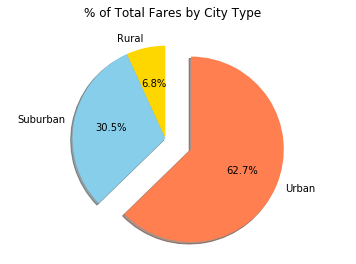

In [302]:
# Calculate Type Percents
city_ride_bytype = city_ride_data.groupby('type')
total_fare = city_ride_data["fare"].sum()
total_fare_bytype= (city_ride_bytype["fare"].sum()/total_fare)*100

# Build Pie Chart
labels= total_fare_bytype.index
colors= ["Gold", "SkyBlue", "Coral"]
explode = [0 , 0, .3]
plt.pie(total_fare_bytype, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = True)
plt.suptitle("% of Total Fares by City Type")
plt.title("                             ")
plt.axis("equal")
# Save Figure
plt.savefig("Data/Pyber_fare_pie.png")
# Show Figure
plt.show()

## Total Rides by City Type

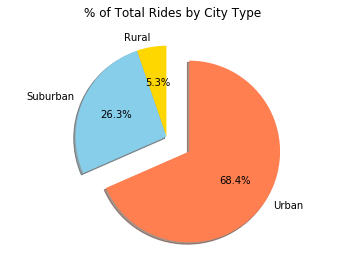

In [303]:
# Calculate Ride Percents
city_ride_bytype = city_ride_data.groupby('type')
total_rides = city_ride_data["ride_id"].count()
total_rides_bytype= (city_ride_bytype["ride_id"].count()/total_rides)*100

# Build Pie Chart
labels= total_rides_bytype.index
colors= ["Gold", "SkyBlue", "Coral"]
explode = [0 , 0, .3]
plt.pie(total_rides_bytype, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = True)
plt.suptitle("% of Total Rides by City Type")
plt.title("                             ")
plt.axis("equal")
# Save Figure
plt.savefig("Data/Pyber_rides_pie.png")
# Show Figure
plt.show()

## Total Drivers by City Type

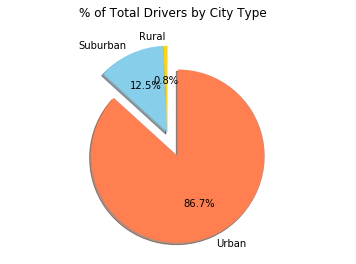

In [304]:
# Calculate Driver Percents
city_ride_bytype = city_ride_data.groupby('type')
total_drivers = city_ride_data["driver_count"].sum()
total_drivers_bytype= (city_ride_bytype["driver_count"].sum()/total_rides)*100
# Build Pie Charts
labels= total_drivers_bytype.index
colors= ["Gold", "SkyBlue", "Coral"]
explode = [0 , 0, .3]
plt.pie(total_drivers_bytype, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = True)
plt.suptitle("% of Total Drivers by City Type")
plt.title("                             ")
plt.axis("equal")
# Save Figure
plt.savefig("Data/Pyber_drivers_pie.png")
# Show Figure
plt.show()

# Analysis
   
   - Ride-sharing is more popular in Urban cities and less in Rural areas, that can be explained by a big number of drivers and      rides in Urban areas compared to Rural and Suburban. 
   - On the other hand, the graph showed that Rural cities people seemed to be paying more in fares than those in Urban and          Suburban. This may be due to long-distance trips in Rural areas.
   - Ride-sharing is more popular in Urban cities and less in Rural areas, that can be explained by a big number of drivers in      Urban areas compared to Rural and Suburban. 
   - On the other hand, the graph showed that Rural cities people seemed to be paying more in fares than those in Urban and          Suburban. this may be due to long-distance trips in Rural areas.
     In general, we can conclude that approximately more than 60% of pyber ride-sharing business concentrated in Urban cities,      about 30% of the business in Suburban cities, and less than 10% is in Rural cities.  
   